In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact # Only works for IPython < 3.x.x. For 4.x.x or above, refer to https://github.com/ipython/ipywidgets
import h5py

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
## load train & test dataset
hf = h5py.File('../data/cifar-10.hdf5','r')
print('datasets: {}'.format(hf.keys()))

#x_train = theano.shared(hf['x_train'][()])
#t_train = theano.shared(dense_to_one_hot(np.array(hf['t_train'][()])))
#x_valid = theano.shared(hf['x_valid'][()])
#t_valid = theano.shared(dense_to_one_hot(np.array(hf['t_valid'][()])))
#x_test  = theano.shared(hf['x_test'][()])
#t_test  = theano.shared(dense_to_one_hot(np.array(hf['t_test'][()])))

n_class     = 10
width_size  = 32
height_size = 32
area_size   = width_size * height_size * 3
trainingSize = hf['train_set_x'].shape[0]
validationSize = hf['valid_set_x'].shape[0]
testSize = hf['test_set_x'].shape[0]

print trainingSize, validationSize, testSize

img_train = hf['train_set_x']
label_train = hf['train_set_y']

img_test = hf['test_set_x']
label_test = hf['test_set_y']

img_valid = hf['valid_set_x']
label_valid = hf['valid_set_y']


batch_size = 50
n_class = 10

n_train_batches = trainingSize
n_test_batches = testSize
n_train_batches /= batch_size
n_test_batches /= batch_size

print '[size of each set]'
print ('training_set : %d, test_set : %d' %(img_train.shape[0], img_test.shape[0]))
print '[size of each batch]'
print ('training_set : %d, test_set : %d' %(n_train_batches, n_test_batches))

datasets: [u'test_set_x', u'test_set_y', u'train_set_x', u'train_set_y', u'valid_set_x', u'valid_set_y']
40000 10000 10000
[size of each set]
training_set : 40000, test_set : 10000
[size of each batch]
training_set : 800, test_set : 200


In [3]:
n_data, channel, width, height= img_train.shape
#n_data_test, width, height, channel = img_test.shape
d_data = width*height*channel
print('x_train - num of data: {}, dimension: {}'.format(n_data, d_data))
size_w, size_h = 32, 32
print('data shape - (width:{}, height:{})'.format(size_w, size_h))

def viz_image(img, pos, title):
    img = np.rollaxis(img,0,3)
    print img.shape
    
    plt.imshow(np.reshape(img, (size_w, size_h, channel)), interpolation='nearest')
    ax = plt.gca()
    ax.autoscale_view(False, False, False)

    #plt.imshow(img, interpolation='nearest')
    plt.title(title)    


x_train - num of data: 40000, dimension: 3072
data shape - (width:32, height:32)


In [4]:
print sum(label_train).astype(int)
print np.array(label_train)
print sum(label_test).astype(int)

179980
[6 9 9 ..., 6 2 8]
45000


In [5]:
img_train.shape

(40000, 3, 32, 32)

In [8]:
#data check
def one_hot_to_dense(labels):
    return np.argmax(labels, axis=1)
 
label_num = 1

#temp = one_hot_to_dense(np.array(loc_label_train))
#temp_test = one_hot_to_dense(np.array(loc_label_test))
idxs = np.where(label_train[:]==label_num)[0].tolist()
#idxs_test = np.where(temp_test==label_num)[0].tolist()
n_data = len(idxs)
#n_data_test = len(idxs_test)
print "training data size : ", n_data
#print "test data size : ", n_data_test

training data size :  3986


(32, 32, 3)
9


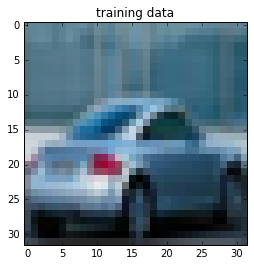

In [9]:
@interact(idx=(0, n_data-1))
def viz_data(idx):
    data = img_train[idxs[idx]]
    viz_image(data, 1, 'training data')
    print label_train[label_num]